_Artifical Neural Networks_(ANN) are machine learning models inspired by the network of biological neurons found in our brains. They are the very core of deep learning. They are versatile, powerful, and scalable, being ideal to tackle large and highly complex ML tasks.

 * ANNs frequently outperform other ML techniques on very large and complex problems.
 * Computer power increased when in comparison to the 90s makes it possible to train large neural networks in a reasonable amount of time


# The Perceptron

The perceptron is one of the simplest ANN architectures, inventend in 1957 by Frank Rosenblatt. It is based on an artifficial neuron called _threshold logic unit_ (TLU)

<div>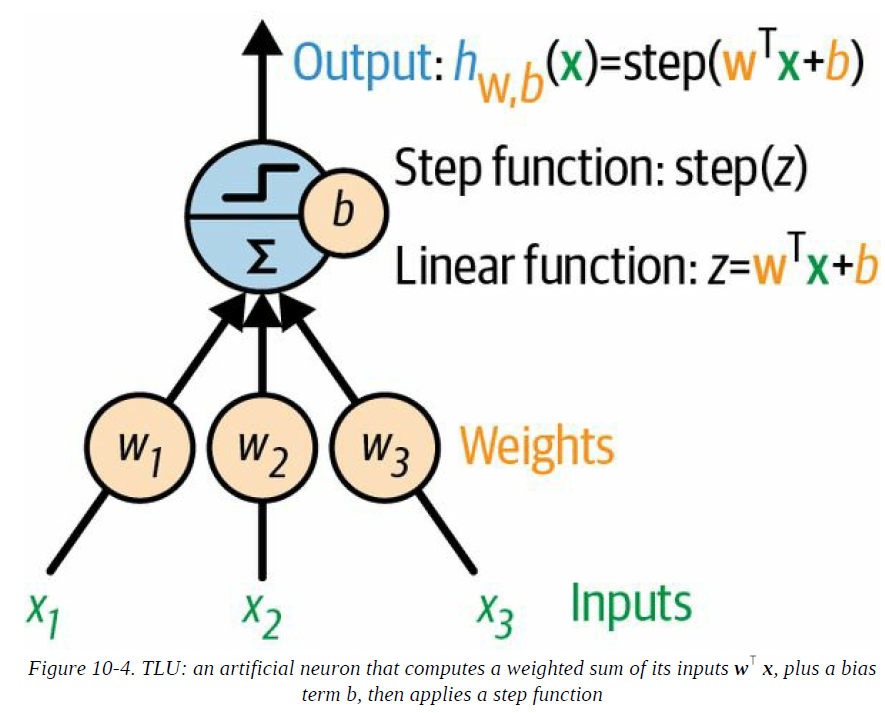</div>

A single TLU can be used for simple linear binary classification: it computes a linear function of the inputs, and classify according to a certain threshold. A perceptron is composed of one or more TLUs organized in a single layer, where every TLU is connected to every input (this is called a _fully connected layer_, or _dense layer_)

<div>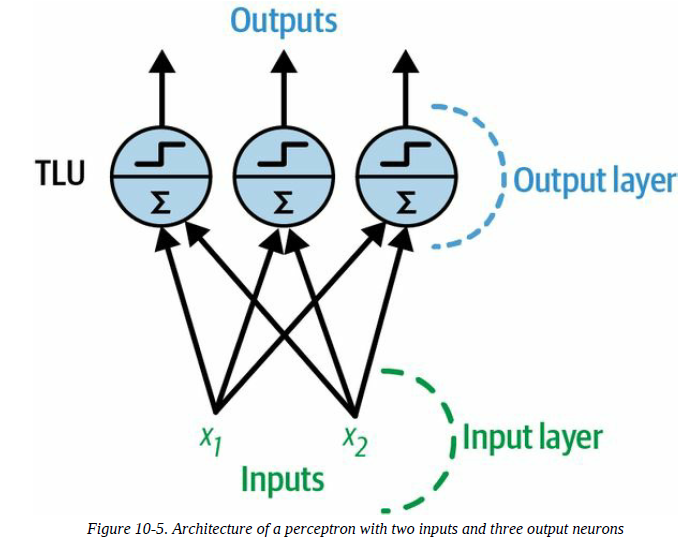</div>


Computing the outputs of a fully connected layer: $$hW,b(x)=\phi (XW+b)$$

Where 
 * $X$ represents matrix of input feature. It has one row per instance and one column per feature
 * the weight matrix $W$ contains all connection weights. One row per input and one column per neuron
 * bias vector $b$ with all bias termos: one per neuron
 * the _activation function_ $\phi$ &rarr; when the artifial neruons are TLUs, it is a step function
 

### How is a perceptron trained?

The connection weight between two neurons tend to increase when they fire simultaneously (Hebb's rule &rarr; _Hebbian learning_).

Perceptrons takes into account the errors made by the network when it makes a prediction. The perceptron learning rule reinforces connections that help reduce the error.

The perceptron is fed one training instance at a time, making predictions for each one of them. For every wrong prediction, it reinforces the connection weights from inputs that would have contributed to the correct prediction. $$w_{i,j}=w_{i,j}+  \eta(y_j-y^j)\times x_i$$

Where:

 * $w_{i,j}$ is the connection weight between the $i^{th}$ input and the $j^{th}$ neuron.
 * $x_i$ is the $i^{th}$ input value of the current training instance.
 * $y^j$ is the output of the $j^{th}$ output neuron for the current training instance
 * $y_j$ is the target output of the $j^{th}$ output neuron for the current training instance.
 * $\eta$ is the learning rate.

IF trraining instances are linearly separable, this algorithm will converge to a solution &rarr; _perceptron convergence theorem_ 

In [ ]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptrons by themselves have a lot of weaknesses, but stacking them help removing these limitations &rarr; _multilayer perceptron_ (MLP). 

Contrary to logistic regression classifiers, perceptrons do not output a class probability.

# Multilayer Perceptron and Backpropagation

An MLP is composed of one input layer, one or more _hidden layers_, and one _output layer_

<div>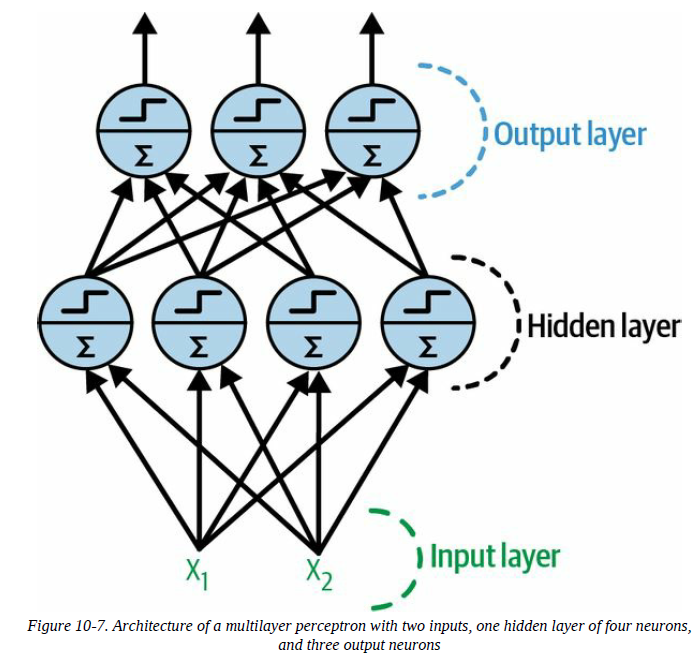</div>
<div>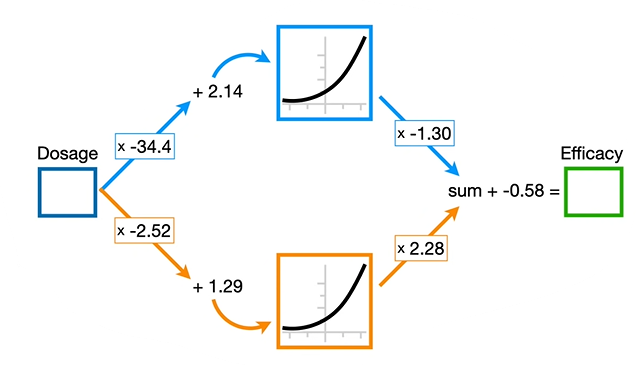</div>


In this example, the signal flow only in one direction &rarr; _feedforward neural network_ (FNN). 

Note: A neural network creates new shapes from the activation functions in the Hidden Layer, adding them togetether to get a squiggle that fits best the data, with each node in the hidden layer using differen portions of the activation functions to create the new shapes. (According to Josh Starmer, you could say that NN could be called Squiggly Fitting Machine)

When an ANN contains a deep stack of hidden layers, it is called a _deep neural network_ (DNN)

_Backpropagation_ is a combination of gradient descent and reverse-mode autodiff, which compute the gradients of the neural network's error with regard to every single model parameter &rarr; it finds how each connection's weights and bias should be tweaked in order to reduce the neural network's error.

Backpropagation is by far the most popular training technique for neural networks.

## How Backpropagation works

1) Go through the full training set multiple times (epoch), handling one mini-batch at a time.

2) Each mini-batch enters the network through the input layer. The algorithm then computes the output of all the neurons in the first hidden layer. The result is passed to the next layer, and so on until the output layer. Every intermediate result is preserved, for they are needed for the backward pass.

3) Measure the network's output error (loss function)

4) Compute how much each output bias and each connection to the ouput layer contributed to the error &rarr; chain rule

<div>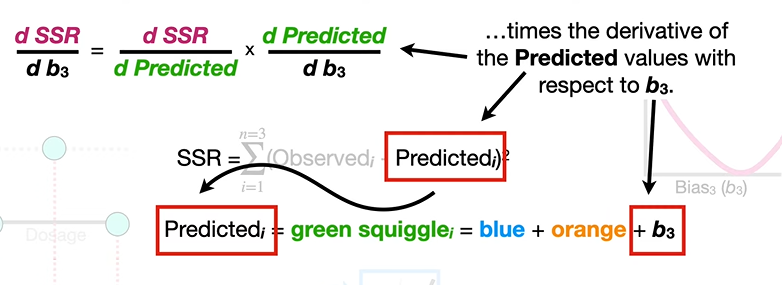</div>

---

<div>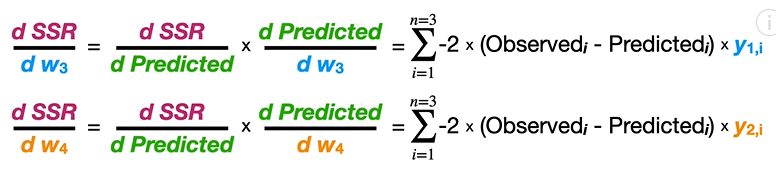</div>

5) Measure how much of theses error contributions came from each connection in the previous layer, working backward until it reaches the input layer 

6) Finally, the algorithm perform a gradient descent step to tweak all the connection weights in the network, using the error gradients it computed.


In summary, backpropagation predict a mini-batch (forward pass), measures the error, goas through each layer in reverse to measure the error contribution (reverse pass) and finally tweaks the connection weights and biases to reduce the error (gradient step).

In order for backpropagation to work properly, the MLP's architecture had to be change: the step function is substituted by the _sigmoid function_ $\sigma(z)= \frac{1}{1+exp(-z)}$.

Backpropagation works well with other activation functions:

 * _hyperbolic tangent function_: $tanh(z)=2\sigma(2z)-1$ &rarr; S-shaped (like sigmoid), continuous and differentiable, but with outputs ranging from -1 to 1 &rarr; outputs more or less centered arround 0 &rarr; often helps speed up convergence
 
 * _rectified linear unit function_: $ReLU(z)=max(0,z)$ 
 * _softplus function_: $softplus(z)=log(1+exp(z))$
<div>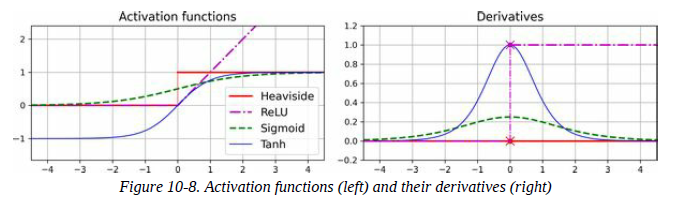</div>



#### Why do we need activation functions?

If we chain several linear transformations, all we get is a linear transformation &rarr; not having some nonlinearity between layers is the equivalent to have a single layer, not being able to solve more complex problems

For example: $f(x) = 3x+1$ and $g(x)= 5x-1$ &rarr; $f(g(x)) = 3(5x-1)+1=15x-2$ 

# Regression MLPs

For regression tasks, we will use a neuron to every output we want to have.

<b>NOTE</b>: ANNs have to have standardized input features, as they era trained using gradient descent.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
                housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
                X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False) # about 0.505

In [2]:
rmse

0.5053326657968528

Some tips regarding the activation functions:

* If we want to guarantee positive outputs always: <b>ReLU or softplus</b>
    * softplut is smoother than ReLU: $soft(z)=(log(1+exp(z))$ &rarr; close to 0 when z is negative, and closer to z when z is positive.
* If we want to guarantee that the predictions will always fall within a given range of values: sigmoid function or hyperbolic tangent, and scale the targets to the appropriate range: <b>0 to 1 for sigmoid and -1 to 1 for tanh</b>


<b>NOTE</b> MLPRegressor clas does not support activation funcitons in the output layers. It also only supports the mean squared error, when you could use MAE for data with many outlier or _Huber loss_, a mix of both, with a quadratic error when it is less than a threshold $\delta$, but linear when it is higher.
   * Thats why building a standard MLP with Scikit-Learn is very limited &rarr; use Keras
   
 <div>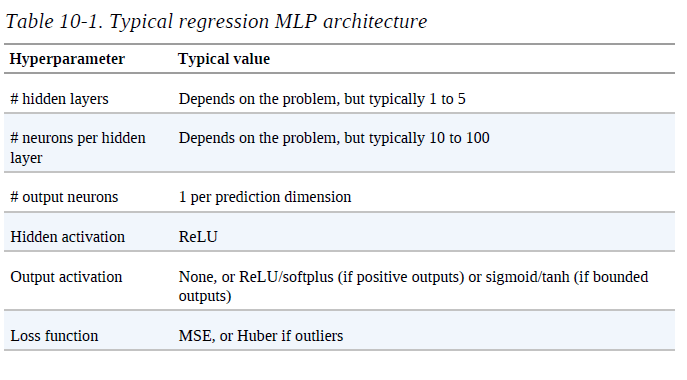</div>
 

#  Classification MLPs

MLPs can handle binary or multilabel binary classification tasks. 

* For binary classification, we simply use a sigmoid function, as we only are interested in 0 or 1 values;

* For multilabel, we want one output neuron per positive class.
    * If we want multiple non-exclusive outputs (for instance spam/not spam and urgent/not urgent email) &rarr; sigmoid
    * If we want multiple exclusive outputs &rarr; softmax. It ensures values between 0 and 1 adding up to 1.
 
Regarding the loss function, we will use cross-entropy loss
<div>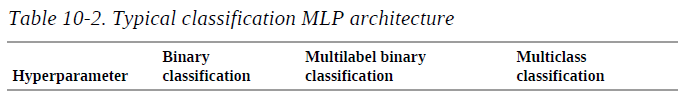
<div>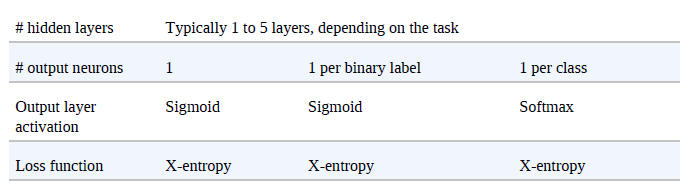


# Implementing MLPs with Keras

Keras &rarr; TensorFlow's high-level deep learning API.
* Train, build, evaluate and execute all sorts of neural networks
* Easy to use, flexible and nice design

* Other popular deep learning libraries: PyTorch (Facebook) and JAX (Google)

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

## Scaling

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

## set class names

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

tf.random.set_seed(42)

# Pass a list of layers when creating the Sequential model. No need to put an
# Input Layer, instead specify the input_shape in the  first layer.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

model.layers #list of layers 
model.get_layer("layer_name")


weights, biaseas = model.layers[n].get_weights()


# Compiling th model: specify loss function and optimizer to use

model.compile(loss="sparse_categorical_crossentropy",
        optimizer="sgd",
        metrics=["accuracy"])




For this case, we use sparse_categorical_crossentropy because the output is one out of ten available and exclusive classes. If instead we had one target probability per class for each instance, then we would use categorical_crossentropy loss instaed.

If we were doing binary classification or multilabel binary classification, then we woul use the sigmoid activation function in the output layer, and we would use the binary_crossentropy loss

In [ ]:
# training and evaluating model

history = model.fit(X_train, y_train, epochs=30,
 validation_data=(X_valid, y_valid))

<div>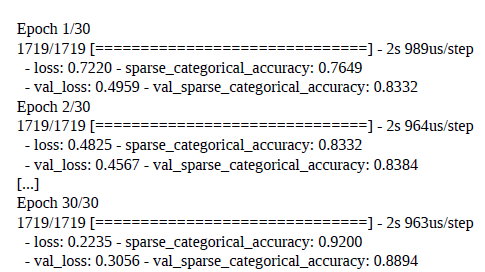</div>

## Building Complex Models Using the Functional API


Not every Neural Network is sequential:

<div>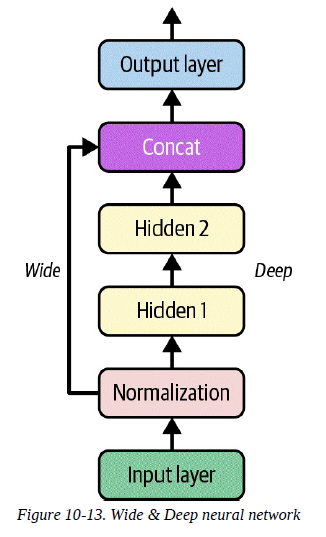</div>

In [ ]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

# Fine-Tuning Neural Network Hyperparameters

One of the issues with Neural Networks is that they have too many hyperparameters to tweak &rarr; network architecture, number of layers, neuros, type of activation functions, weight initialization logic, type of optimizer, learning rate, batch size, etc

How to know which combination is best for our task?

- We could convertar the Keras model to a Scikit-Learn estimator, and then use GridSearchCV or RandomizedSearchCV to fine-tune the hyperparameters.

- Use _Keras Tuner_ library, a hyperparameter tuning library for Keras models &rarr; highly customizable.

In [ ]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                    metrics=["accuracy"])
    return model

## Some guidelines when selecting hyperparameters

### Number of Hidden Layers

For complex problems, deep networks have a much higher _parameter efficiency_ than shallow ones: they model complex functions using exponentially fewer neuros than shallow nets, allowing them to reach better perfroamnce with the same amoun of training data.

Real-world data is often structured in hierarchical way, and deep neural networks automatically take advantage of this: lower hidden layers model low-level structures, intermediate hidden layers combine theses low-leve structures to model intermediate-levestructures, and the highes hidden layers and the output layer combine these intermediate structures to model high-level structures.

This hierarchical architecture helps DNNs converge faster to a good solution, improving also their ability to generalize to new datasets &rarr; _transfer learning_
 * By reusing layers from a previous network, using its initial biases and weights, the network will not have to learn from scratch all the low-level structures that occur, only learning the higher-level structures.
 
 
 <b>In summary</b>, start with one or two hidden layers. For more complex problems, ramp up the number of hidden layers until overfitting begins.

### Number of Neurons per Hidden Layer

The number of neurons in the input and output is determined by the type of input and output the tasks requires. The broad range of values that the Raw Ouput can have makes it necessary to use an activation function layer at the end.

For the hidden layers, it is used to be common to size them to form a pyramid &rarr; fewer neurons at each layer, as  many low-level features can combine into far fewer high-level features. However, this practice has fallen into disuse, as it seem that the same number of neuros in all hidden layer performs just as well.

Just as the number of layers, increase number of neurons until overfitting starts

Alternatively, build a model with slightly more layers and neuros than we actually need, then use early stopping and other regularizations tools to prevent it from overfitting &rarr; "stretch pants" approach.


#### In general, increasing the number of layers will have a bigger impact thant increasing number of neuros.

###  Learning Rate, Batch Size, and Other Hyperparameters

#### Learning Rate

Arguably the most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate.

Start with a very low learning rate ($\approx 10^{-5}$/) and gradually increase it to a very large value (10), multiplying it by a constant factor at each iteration (for example, 500 iterations)

 * Plot the loss as a function of the learning rate (log scale for the learning rate), the optimal learning rate will be a bit lower thant the point at which the loss function starts to climb.
 
#### Optimizer
 In the following chapters we will see other alternatives to mini-batch gradient descent
 
#### Batch Size
Many researchers recommend using the largest batch size that can fit in GPU RAM. However, larger batch sizes tend to generate training instabilities, so the model may not generalize well.

Try larger batch sizes, with warmed learning rate &rarr; if training is unstable, use small batch size (2-32)

#### Activation Function
ReLU will be a good default, however for the output we need to verify the desired task.

#### Number of iterations
Most of cases: early stopping


<b>Note</b>: The optimal leraning rate depends on other parameters - if tweaked, update the learning rate as well.